In [84]:
import pandas as pd
import numpy as np
#import pandas_profiling
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from pandas import read_csv, DataFrame
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from catboost import CatBoostRegressor, cv
from IPython.display import display
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, max_error

In [17]:
# Задаем рабочую папку
import os
os.chdir(r"C:\Users\Ckomap\Desktop\Вкр")

In [18]:
#Загрузим ранее полученные датафреймы
df = pd.read_csv('df.csv')
df_norm = pd.read_csv('df_norm.csv')
df_0 = pd.read_csv('df_0.csv')
df_1 = pd.read_csv('df_1.csv')

In [71]:
##Разобьем данные на тестовую и итоговую выборки 
#df_norm
x_norm = df_norm[['Соотношение матрица-наполнитель','Угол нашивки, град','модуль упругости, ГПа','Плотность, кг/м3','Количество отвердителя, м.%','Содержание эпоксидных групп,%_2','Температура вспышки, С_2','Поверхностная плотность, г/м2','Потребление смолы, г/м2','Шаг нашивки','Плотность нашивки']]
y_norm = df_norm[['Прочность при растяжении, МПа','Модуль упругости при растяжении, ГПа']]
x_norm_train, x_norm_test, y_norm_train, y_norm_test = train_test_split(x_norm,y_norm,test_size=0.3,random_state=42)
print(x_norm_train.shape, x_norm_test.shape, y_norm_train.shape, y_norm_test.shape)
#df_0
x_0 = df_0[['Соотношение матрица-наполнитель','Угол нашивки, град','модуль упругости, ГПа','Плотность, кг/м3','Количество отвердителя, м.%','Содержание эпоксидных групп,%_2','Температура вспышки, С_2','Поверхностная плотность, г/м2','Потребление смолы, г/м2','Шаг нашивки','Плотность нашивки']]
y_0 = df_0[['Прочность при растяжении, МПа','Модуль упругости при растяжении, ГПа']]
x_0_train, x_0_test, y_0_train, y_0_test = train_test_split(x_0,y_0,test_size=0.2,random_state=42)
#df_1
x_1 = df_1[['Соотношение матрица-наполнитель','Угол нашивки, град','модуль упругости, ГПа','Плотность, кг/м3','Количество отвердителя, м.%','Содержание эпоксидных групп,%_2','Температура вспышки, С_2','Поверхностная плотность, г/м2','Потребление смолы, г/м2','Шаг нашивки','Плотность нашивки']]
y_1 = df_1[['Прочность при растяжении, МПа','Модуль упругости при растяжении, ГПа']]
x_1_train, x_1_test, y_1_train, y_1_test = train_test_split(x_1,y_1,test_size=0.2,random_state=42)


(697, 11) (299, 11) (697, 2) (299, 2)
Размер обучающей выборки общей: 697
Размер тестовой выборки общей: 299

Размер обучающей выборки 0-го кластера: 383
Размер тестовой выборки 0-го кластера: 96

Размер обучающей выборки 1-го кластера: 413
Размер тестовой выборки 1-го кластера: 104


In [103]:
#Оценим значимость столбцов через влияние на построе деревьев случайного леса
def model_rfc(x_rfc, y_rfc, x_rfc_test, y_rfc_test):
    RFC = RandomForestRegressor()
    RFC.fit(x_rfc, y_rfc)
    rfc_imp = pd.Series(RFC.feature_importances_, x_rfc.columns)
    #график значимости
    fig, ax = plt.subplots(figsize=(10,6))
    rfc_imp.plot.bar(ax=ax)
    ax.set_title("Важность признаков")
    ax.set_ylabel('Важность')
    fig.tight_layout()
    display(pd.DataFrame({'feature': x_rfc.columns,
                        'importance': RFC.feature_importances_}).sort_values('importance', ascending=False ).T)
    print()

,7,4,8,2,5,10,6,0,9,3,1
feature,"Поверхностная плотность, г/м2","Количество отвердителя, м.%","Потребление смолы, г/м2","модуль упругости, ГПа","Содержание эпоксидных групп,%_2",Плотность нашивки,"Температура вспышки, С_2",Соотношение матрица-наполнитель,Шаг нашивки,"Плотность, кг/м3","Угол нашивки, град"
importance,0.1119,0.110906,0.102944,0.097964,0.097704,0.095844,0.09457,0.092356,0.090992,0.090846,0.013973


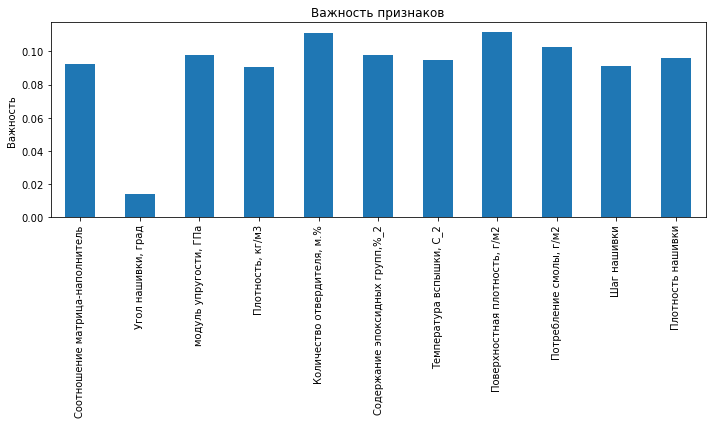

In [104]:
model_rfc(x_norm_train, y_norm_train,x_norm_test, y_norm_test)

,3,4,9,8,0,2,7,5,10,6,1
feature,"Плотность, кг/м3","Количество отвердителя, м.%",Шаг нашивки,"Потребление смолы, г/м2",Соотношение матрица-наполнитель,"модуль упругости, ГПа","Поверхностная плотность, г/м2","Содержание эпоксидных групп,%_2",Плотность нашивки,"Температура вспышки, С_2","Угол нашивки, град"
importance,0.126684,0.109145,0.099602,0.098809,0.098567,0.095709,0.095635,0.091741,0.085418,0.081855,0.016836


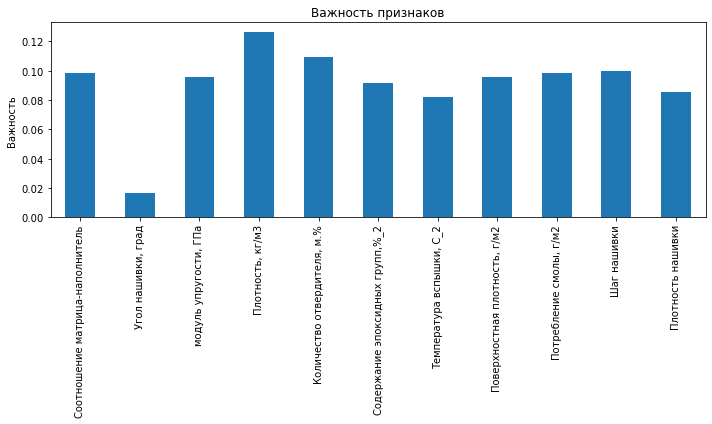

In [105]:
model_rfc(x_0_train, y_0_train, x_0_test, y_0_test)

,4,6,3,8,10,2,7,0,9,5,1
feature,"Количество отвердителя, м.%","Температура вспышки, С_2","Плотность, кг/м3","Потребление смолы, г/м2",Плотность нашивки,"модуль упругости, ГПа","Поверхностная плотность, г/м2",Соотношение матрица-наполнитель,Шаг нашивки,"Содержание эпоксидных групп,%_2","Угол нашивки, град"
importance,0.114191,0.113564,0.111418,0.106192,0.101097,0.090164,0.08808,0.087701,0.087648,0.086944,0.013002


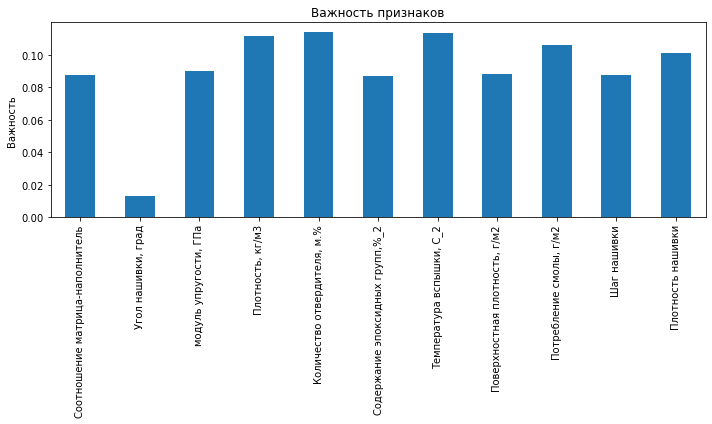

In [106]:
model_rfc(x_1_train, y_1_train, x_1_test, y_1_test)

In [99]:
#Сделаем предположение об использовании только 6 наиболее значимых параметров
#df_norm
x_6 = df_norm[['Плотность, кг/м3','Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2',
               'Температура вспышки, С_2','Потребление смолы, г/м2','Плотность нашивки']]
y_6 = df_norm[['Прочность при растяжении, МПа','Модуль упругости при растяжении, ГПа']]
x_6_train, x_6_test, y_6_train, y_6_test = train_test_split(x_6,y_6,test_size=0.3,random_state=42)
#df_0
x_06 = df_0[['Плотность, кг/м3','Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2',
               'Температура вспышки, С_2','Потребление смолы, г/м2','Плотность нашивки']]
y_06 = df_0[['Прочность при растяжении, МПа','Модуль упругости при растяжении, ГПа']]
x_06_train, x_06_test, y_06_train, y_06_test = train_test_split(x_06,y_06,test_size=0.2,random_state=42)
#df_1
x_16 = df_1[['Плотность, кг/м3','Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2',
               'Температура вспышки, С_2','Потребление смолы, г/м2','Плотность нашивки']]
y_16 = df_1[['Прочность при растяжении, МПа','Модуль упругости при растяжении, ГПа']]
x_16_train, x_16_test, y_16_train, y_16_test = train_test_split(x_16,y_16,test_size=0.2,random_state=42)